 # Step 1: Import Libraries

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.feature_extraction.text import TfidfVectorizer
import warnings
warnings.filterwarnings('ignore')
sns.set(style="whitegrid")


# Step 2: Load Dataset

In [13]:
df = pd.read_csv("NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv")
df.head()


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


# Step 3: Understand the Dataset


Dataset Overview
- This dataset contains information about Netflix TV shows and movies including title, cast, country, release year, genre, and more. The goal is to cluster similar content using unsupervised learning to help Netflix understand their catalog better.


# Step 4: Check for Missing Values

In [14]:
df.info()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

 # Step 5: Data Cleaning

In [21]:
# Drop rows with missing titles
df.dropna(subset=['title'], inplace=True)

# Fill other missing fields
df['country'] = df['country'].fillna('Unknown')
df['cast'] = df['cast'].fillna('Unknown')
df['director'] = df['director'].fillna('Unknown')
df['rating'] = df['rating'].fillna('Unknown')

# Handle date formats
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month

df.head()



,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added,genres,Cluster
0,s1,TV Show,3%,Unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020.0,8.0,"International TV Shows, TV Dramas",2
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016.0,12.0,"Dramas, International Movies",0
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2018.0,12.0,"Horror Movies, International Movies",0
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",2017.0,11.0,"Action & Adventure, Independent Movies",3
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,2020.0,1.0,Dramas,0


# Step 6: Exploratory Data Analysis

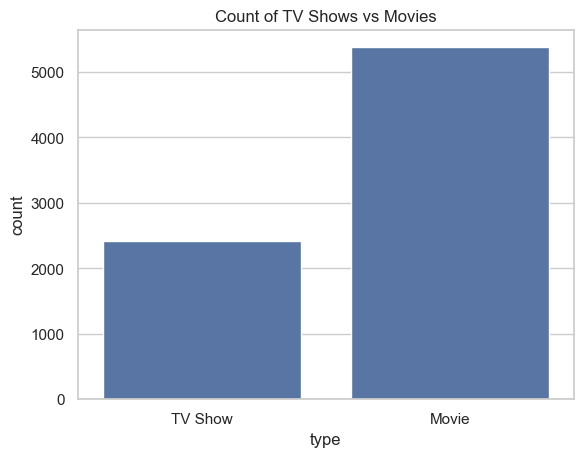

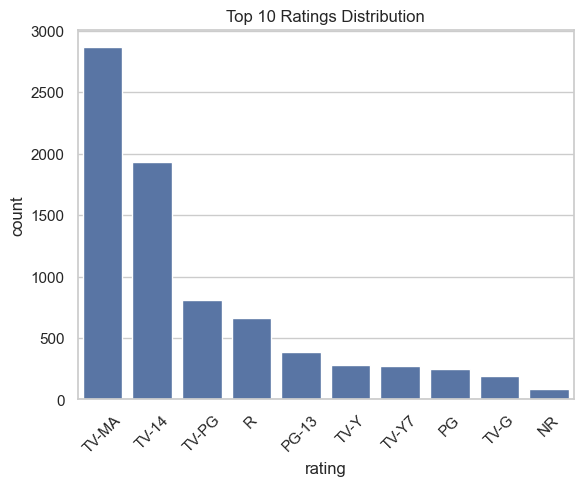

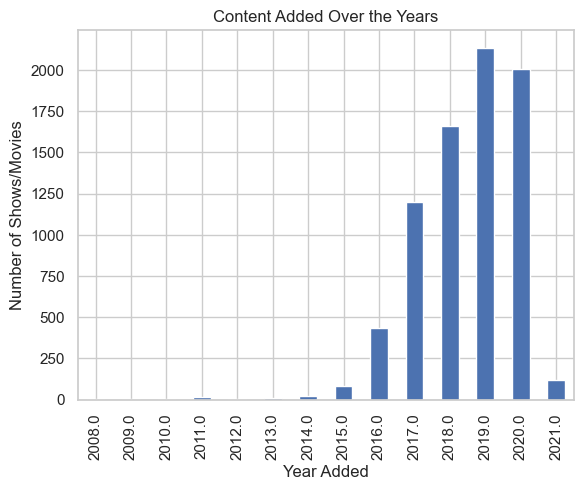

In [23]:
# Plot TV Shows vs Movies
sns.countplot(data=df, x='type')
plt.title("Count of TV Shows vs Movies")
plt.show()

# Top 10 Ratings
sns.countplot(data=df, x='rating', order=df['rating'].value_counts().index[:10])
plt.title("Top 10 Ratings Distribution")
plt.xticks(rotation=45)
plt.show()

# Content Added by Year
df['year_added'].value_counts().sort_index().plot(kind='bar')
plt.title("Content Added Over the Years")
plt.xlabel("Year Added")
plt.ylabel("Number of Shows/Movies")
plt.show()


 # Step 7: Hypotheses


- Netflix has shifted toward TV Shows in recent years.
- Specific genres dominate in different clusters.
- Clustering reveals content groups useful for targeted recommendations.


 # Step 8: Feature Engineering & Preprocessing

In [25]:
# Extract genre information
df['genres'] = df['listed_in'].apply(lambda x: ', '.join(x.split(',')[:2]))

# TF-IDF Vectorization on genres
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(df['genres'])

# Create feature dataframe
features = pd.DataFrame(tfidf_matrix.toarray(), index=df.index)
features['release_year'] = df['release_year']
features['type'] = df['type'].map({'Movie': 0, 'TV Show': 1})

features.fillna(0, inplace=True)

# Fix column names (for numeric conversion)
features.columns = features.columns.astype(str)

# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)


# Step 9: Elbow Method for Optimal Clusters

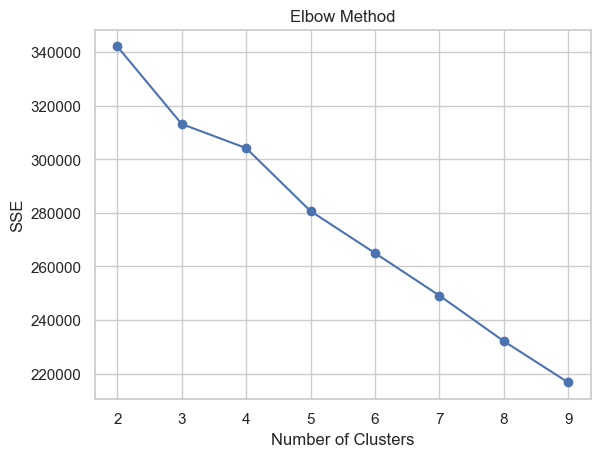

In [27]:
# Elbow Method to determine optimal number of clusters
sse = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    sse.append(kmeans.inertia_)

plt.plot(range(2, 10), sse, marker='o')
plt.title("Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()


# Step 10: Final KMeans Clustering + PCA Visualization

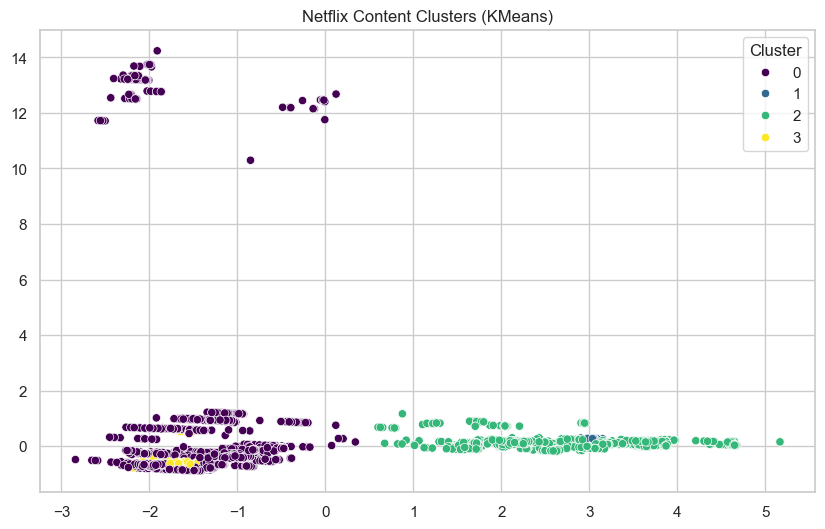

In [28]:
# Apply KMeans with chosen number of clusters
kmeans = KMeans(n_clusters=4, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_features)

# Reduce dimensions for visualization
pca = PCA(n_components=2)
reduced = pca.fit_transform(scaled_features)

# Plot clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=reduced[:, 0], y=reduced[:, 1], hue=df['Cluster'], palette='viridis')
plt.title("Netflix Content Clusters (KMeans)")
plt.show()


# Step 11: Second Model – Agglomerative Clustering

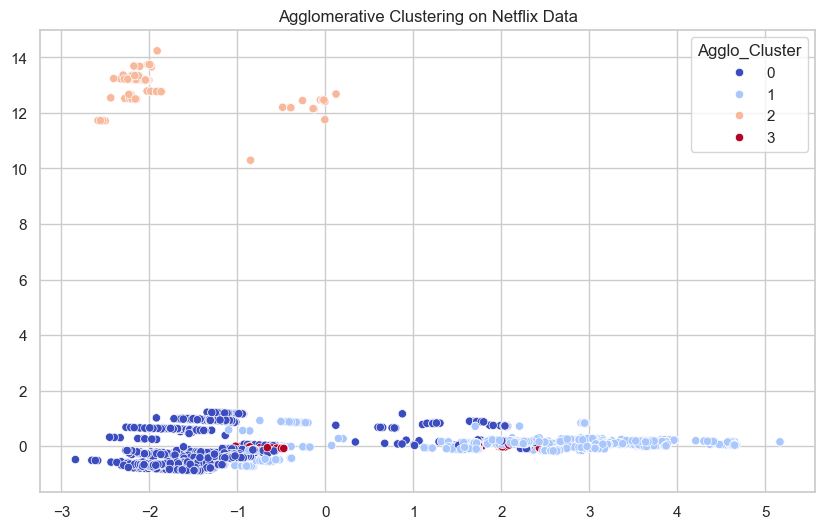

In [30]:
# Import Agglomerative Clustering
from sklearn.cluster import AgglomerativeClustering
# Apply Agglomerative Clustering
agg_cluster = AgglomerativeClustering(n_clusters=4)
df['Agglo_Cluster'] = agg_cluster.fit_predict(scaled_features)

# Plot Agglomerative Clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=reduced[:, 0], y=reduced[:, 1], hue=df['Agglo_Cluster'], palette='coolwarm')
plt.title("Agglomerative Clustering on Netflix Data")
plt.show()


# Step 12: Dendrogram for Hierarchical Clustering

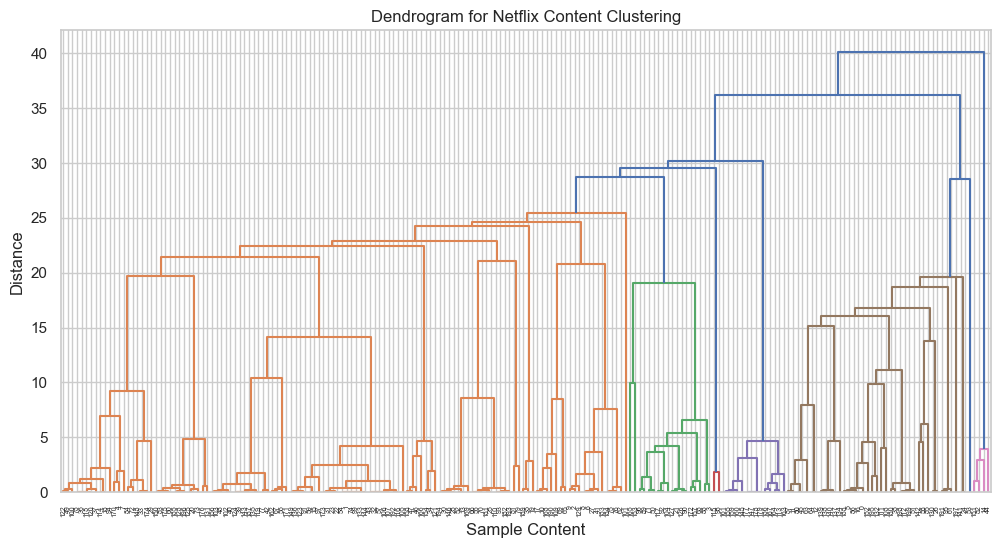

In [32]:
# Optional: Dendrogram to visualize cluster hierarchy
from scipy.cluster.hierarchy import dendrogram, linkage

# Compute the linkage matrix (using a sample if data is large)
sampled_data = scaled_features[:200]  # use a sample to make dendrogram readable
linked = linkage(sampled_data, method='ward')

plt.figure(figsize=(12, 6))
dendrogram(linked,
           orientation='top',
           distance_sort='descending',
           show_leaf_counts=False)
plt.title('Dendrogram for Netflix Content Clustering')
plt.xlabel('Sample Content')
plt.ylabel('Distance')
plt.show()


# Step 13: Cluster Summary & Evaluation

In [31]:
# KMeans cluster summary
print("KMeans Cluster Distribution:")
print(df.groupby('Cluster')['type'].value_counts())

# Agglomerative cluster summary
print("\nAgglomerative Cluster Distribution:")
print(df.groupby('Agglo_Cluster')['type'].value_counts())


KMeans Cluster Distribution:
Cluster  type   
0        Movie      4848
         TV Show      20
1        TV Show      39
2        TV Show    2351
3        Movie       529
Name: count, dtype: int64

Agglomerative Cluster Distribution:
Agglo_Cluster  type   
0              Movie      4748
               TV Show     133
1              TV Show    2213
               Movie       194
2              Movie       112
               TV Show      18
3              Movie       323
               TV Show      46
Name: count, dtype: int64


 # Step 14: Final Conclusion & Stakeholder Value

# Conclusion
- KMeans and Agglomerative Clustering reveal similar content groupings.
- These clusters can help Netflix recommend content more effectively.
- Stakeholders (e.g., product, marketing) can use clusters for targeted strategies, improving user retention and engagement.

